# Bike Sharing Demand
by Sean Park  
2020.04.24
* Goal: RMSLE - under 0.400

# Data Fields
* datetime - hourly date + timestamp  
* season
    * 1 = spring, 
    * 2 = summer, 
    * 3 = fall, 
    * 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# 데이터 불러오고 형태 파악

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 폰트 크기
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [3]:
df_train = pd.read_csv('../input/bike-sharing-demand/train.csv')
df_test = pd.read_csv('../input/bike-sharing-demand/test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
print('Null in train : {}\nNull in test: {}'.format(df_train.isnull().sum().sum(), df_test.isnull().sum().sum()))

Null in train : 0
Null in test: 0


In [7]:
print('df_train.shape: {}\ndf_test.shape: {}'.format(df_train.shape, df_test.shape))

df_train.shape: (10886, 12)
df_test.shape: (6493, 9)


* 테스트 세트에는 registeed, casual, count 컬럼이 없음

In [8]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df_train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [10]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
df_test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [12]:
df_train.datetime.value_counts().head(10)

2011-11-12 00:00:00    1
2011-09-04 03:00:00    1
2012-03-16 22:00:00    1
2012-08-07 13:00:00    1
2011-03-01 19:00:00    1
2012-09-09 17:00:00    1
2012-11-06 01:00:00    1
2011-09-03 19:00:00    1
2011-12-10 18:00:00    1
2012-12-03 07:00:00    1
Name: datetime, dtype: int64

* datetime 컬럼의 형식을 object에서 날짜 형식으로 변경하자.
    * year, month, day, hour, day of week 로 구분하도록 하자.
    * minute와 seconds는 알아도 크게 유의미하지 않다고 판단되고, 어차피 값이 모두 0이다.

In [13]:
# pandas 
for df in [df_train, df_test]: df['datetime'] = pd.to_datetime(df['datetime'])

In [14]:
for df in [df_train, df_test]:
    df['year'] = df.datetime.dt.year
    df['month'] = df.datetime.dt.month
    df['day'] = df.datetime.dt.day
    df['hour'] = df.datetime.dt.hour
    df['dow'] = df.datetime.dt.dayofweek
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [15]:
numeric_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df_train[numeric_col].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* 각 컬럼들의 평균과 분포를 확인할 수 있다.
* casual 이용자보다 registered 이용자가 더 많다.

# EDA
* 데이터를 이해하기 위해 탐색하고, 시각화해보자.

## 0. 상관관계 히트맵
* 먼저, 각 피처들 간 상관관계를 시각화해보자.

In [16]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


Text(0.5, 1.0, 'Correlation')

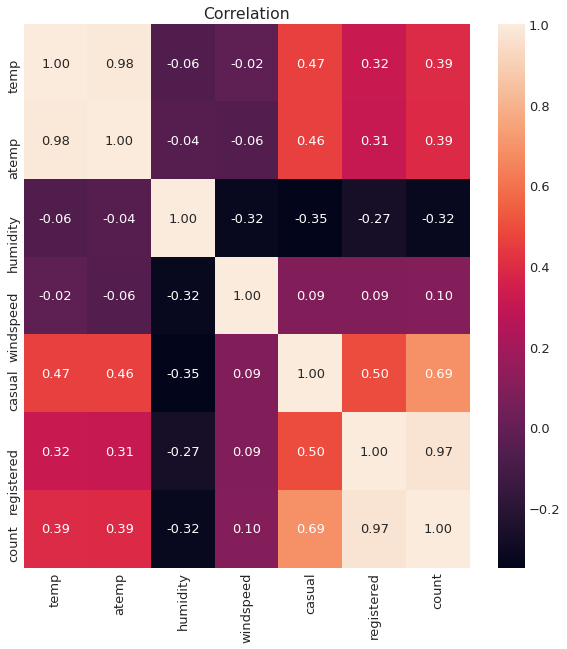

In [17]:
col_numeric = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(10, 10))
sns.heatmap(df_train[col_numeric].corr(), annot=True, fmt='.2f')
plt.title('Correlation')

* 온도, 체감온도와 이용량이 양의 상관관계를 보인다.
* 습도와 이용량이 양의 상관관계에 있다.
    * 습도가 높을수록 불쾌지수가 높아져서 그런가?
* 풍속은 상관관계가 0.1미만으로 약하다.

## 1. Season
*Description  
1 = spring, 2 = summer, 3 = fall, 4 = winter*
* 계절에 따른 이용 변화를 파악해보자.
* 추운 날보다는 따뜻한 날에 이용이 높을 것으로 예상되는데, 이를 중점으로 살펴보자.

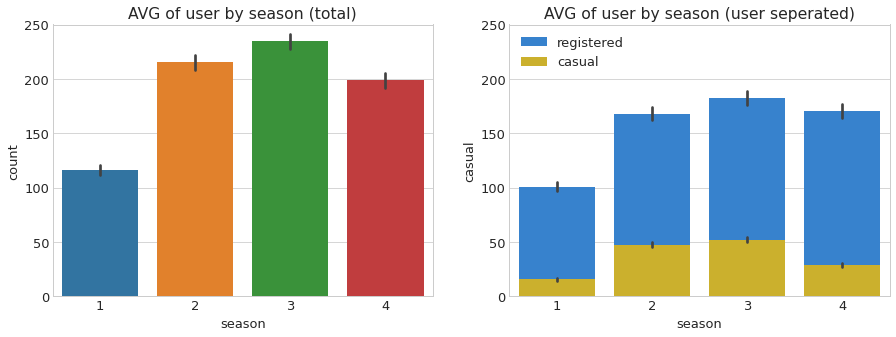

In [18]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
color = ['#1E82E6', '#E6C112', '#E66C29']
sns.barplot('season', 'count', data=df_train, ax=ax[0])
ax[0].set_title('AVG of user by season (total)')

sns.barplot('season', 'registered', data=df_train, color=color[0], ax=ax[1], label='registered')
sns.barplot('season', 'casual', data=df_train, color=color[1], ax=ax[1], label='casual')
ax[1].legend(loc=2)
ax[1].set_title('AVG of user by season (user seperated)')

# y축 고정
for ax in [ax[0], ax[1]]:
    ax.set_ylim(0,250)

* 봄의 이용자가 가장 적었고, 가을의 이용자가 가장 많았다.
* registered, casual 이용자 모두 계절에 따른 변화 추이가 비슷하다.
    * 한 가지 다른점은, casual 이용자의 겨울 감소폭이 상대적으로 높다.

## 2. Holiday
* 휴일의 이용 상황을 파악해보자.

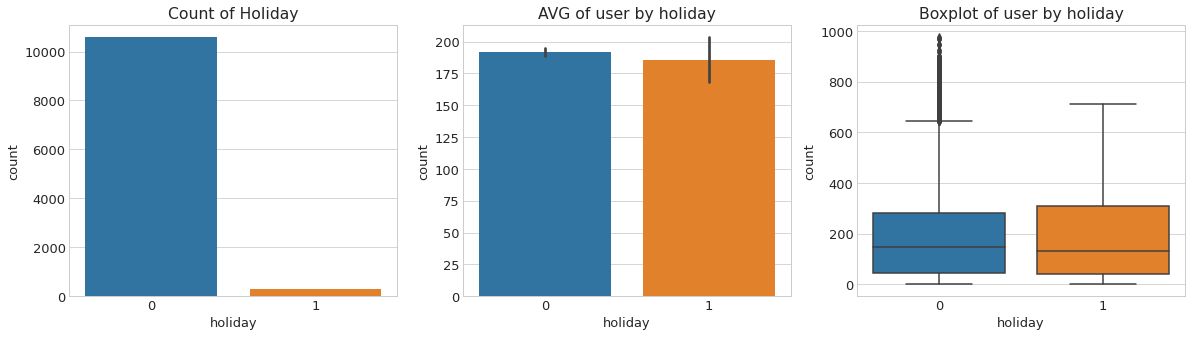

0    10575
1      311
Name: holiday, dtype: int64


In [19]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot('holiday', data=df_train, ax=ax[0])
ax[0].set_title('Count of Holiday')

sns.barplot('holiday', 'count', data=df_train, ax=ax[1])
ax[1].set_title('AVG of user by holiday')

sns.boxplot('holiday', 'count', data=df_train, ax=ax[2])
ax[2].set_title('Boxplot of user by holiday')
plt.show();
print(df_train.holiday.value_counts())

* 샘플 차이가 많이 나기때문에 평균 뿐만 아니라, 사분위값도 함께 확인
* 평균, 중앙값에 큰 차이가 없는 것으로 보인다.
* 그러면 유저별로 나눠서 살펴보자.

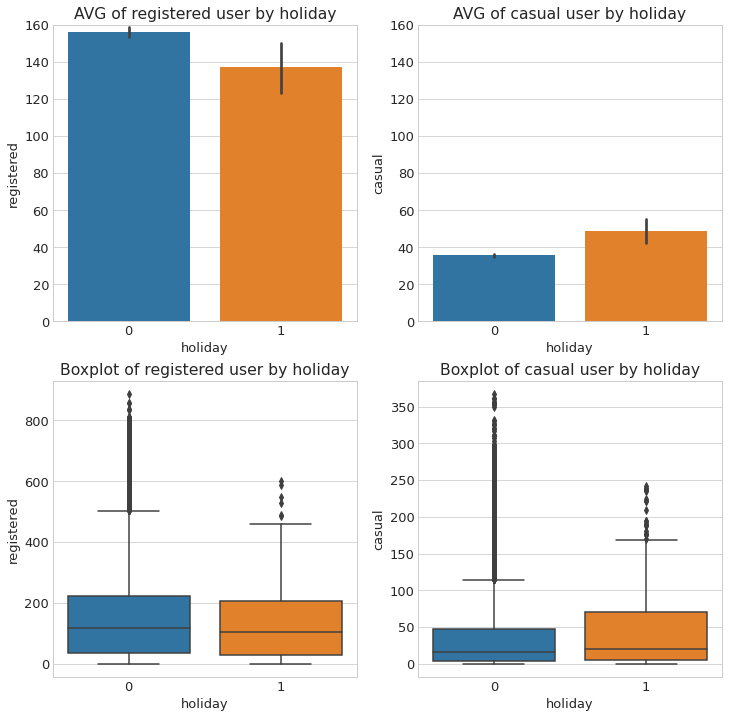

In [20]:
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 12))
sns.barplot('holiday', 'registered', data=df_train, ax=ax0)
ax0.set_title('AVG of registered user by holiday')

sns.barplot('holiday', 'casual', data=df_train, ax=ax1)
ax1.set_title('AVG of casual user by holiday')

for ax in [ax0, ax1]:
    ax.set_ylim(0, 160)
    
sns.boxplot('holiday', 'registered', data=df_train, ax=ax2)
ax2.set_title('Boxplot of registered user by holiday')

sns.boxplot('holiday', 'casual', data=df_train, ax=ax3)
ax3.set_title('Boxplot of casual user by holiday')
plt.show();

* 분리해서 살펴보니, registered 이용자는 휴일에 이용이 감소하는 반면, casual 유저는 증가한다.
* 하지만 앞에서 언급했듯 두 집단은 샘플 차이가 많이 나기 때문에, 아직 유의미한 차이라고 하기는 어렵다.
    * Q1 ~ Q3 부분의 범위도 많이 겹치는 것을 볼 수 있다.
* 실제 차이가 있는지 검정을 해보자.

In [21]:
from scipy import stats

for user in ['registered', 'casual']:
    holiday = df_train[df_train['holiday']==0][user]
    n_holiday = df_train[df_train['holiday']==1][user]
    tTest = stats.ttest_ind(holiday, n_holiday, equal_var=False)
    print('{}의 tTest 결과:\nt통계량: {:.2f}, p값: {:.4f}'.format(user, tTest[0], tTest[1]))

registered의 tTest 결과:
t통계량: 2.67, p값: 0.0079
casual의 tTest 결과:
t통계량: -3.73, p값: 0.0002


* 실제 평균 차이가 있음을 확인할 수 있다.

## 3. Workingday

Text(0.5, 1.0, 'AVG user by workingday')

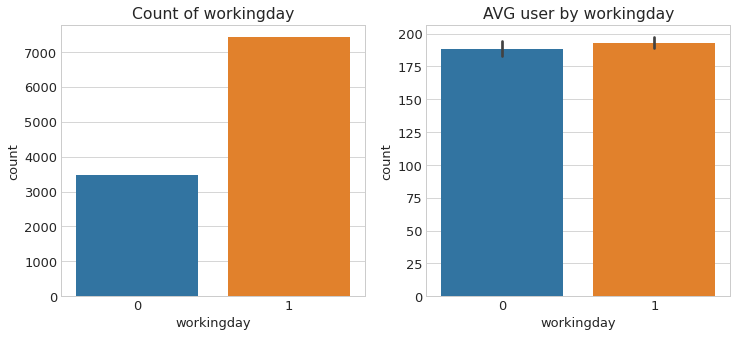

In [22]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot('workingday',data=df_train, ax=ax[0])
ax[0].set_title('Count of workingday')
sns.barplot('workingday', 'count', data=df_train, ax=ax[1])
ax[1].set_title('AVG user by workingday')

* 전체 유저를 비교해보니, 근무일 여부에 따른 이용수 평균은 큰 차이가 없어보인다.

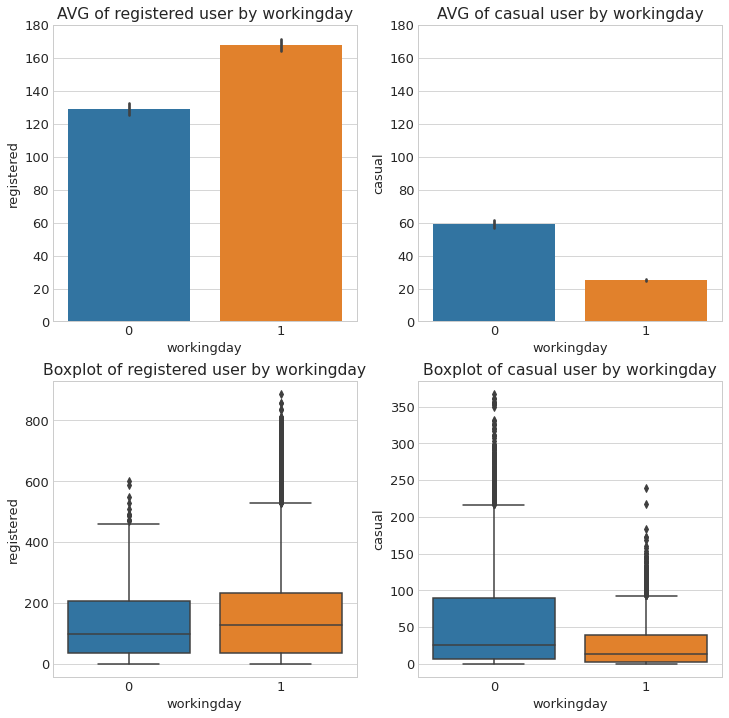

In [23]:
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 12))
sns.barplot('workingday', 'registered', data=df_train, ax=ax0)
ax0.set_title('AVG of registered user by workingday')

sns.barplot('workingday', 'casual', data=df_train, ax=ax1)
ax1.set_title('AVG of casual user by workingday')

for ax in [ax0, ax1]: ax.set_ylim(0, 180)

sns.boxplot('workingday', 'registered', data=df_train, ax=ax2)
ax2.set_title('Boxplot of registered user by workingday')

sns.boxplot('workingday', 'casual', data=df_train, ax=ax3)
ax3.set_title('Boxplot of casual user by workingday')
plt.show();

* 하지만 유저를 나누어보니, registered 유저는 이용이 증가하고 casual 유저는 감소한다.
    * 휴일과 반대인 경향을 보인다.
* registered 유저는 출퇴근 목적으로 자전거를 이용하고, casual은 여가, 취미 등으로 이용하는 것일까?

## 4. Weather

*Description  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*
        
* 날씨에 따른 이용 추이를 살펴보자.
* 상식적으로는 날씨가 좋을수록*(1에 가까울수록)* 이용이 증가할 것으로 예상된다.

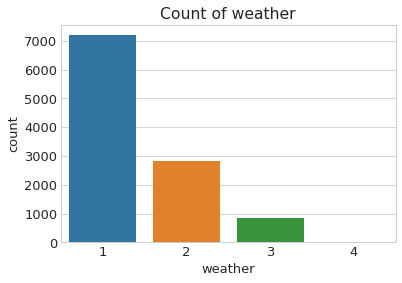

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [24]:
sns.countplot('weather', data=df_train)
plt.title('Count of weather')
plt.show();
print(df_train.weather.value_counts())

* 날씨가 좋은 날(1)이 가장 많았고, 날이 가장 안좋았던 날(4)은 하루밖에 없었다.
* 4에 대한 샘플은 하나뿐임을 감안하고 볼 것

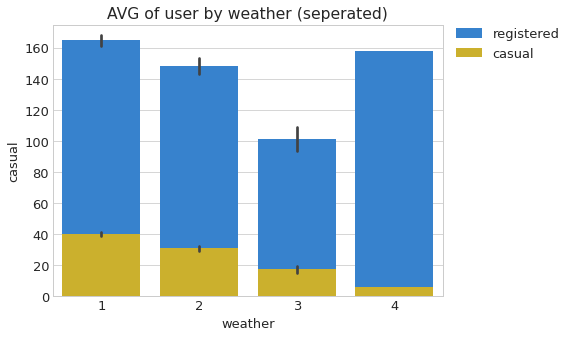

In [25]:
plt.figure(figsize=(7, 5))
sns.barplot('weather', 'registered', data=df_train, color=color[0], label='registered')
sns.barplot('weather', 'casual', data=df_train, color=color[1], label='casual')
plt.ylim(0, 175)
plt.title('AVG of user by weather (seperated)')
plt.legend(loc=(1.02, 0.85))

* 예상대로 날씨가 좋은 날에 이용이 높았다.
* 날씨가 가장 안 좋은날(4)에는 이용이 높았으나, 샘플이 하나이므로 큰 의미는 없다.

## 5. Temp, Atemp
* 온도, 체감온도와 이용수와의 관계를 보자.

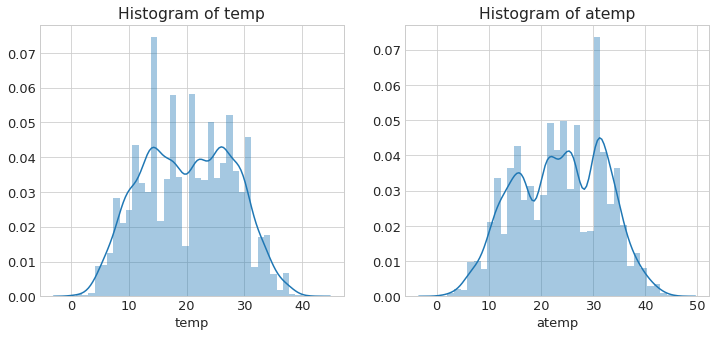

In [26]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
for ax, col in zip([ax[0], ax[1]], ['temp', 'atemp']):
    sns.distplot(df_train[col], ax=ax)
    ax.set_title('Histogram of {}'.format(col))

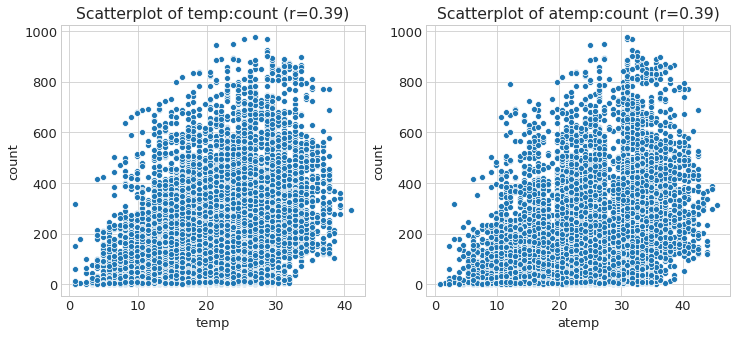

In [27]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
for ax, col in zip([ax[0], ax[1]], ['temp', 'atemp']):
    sns.scatterplot(col, 'count', data=df_train, ax=ax)
    ax.set_title('Scatterplot of {}:count (r={:.2f})'.format(col, df_train['count'].corr(df_train[col])))

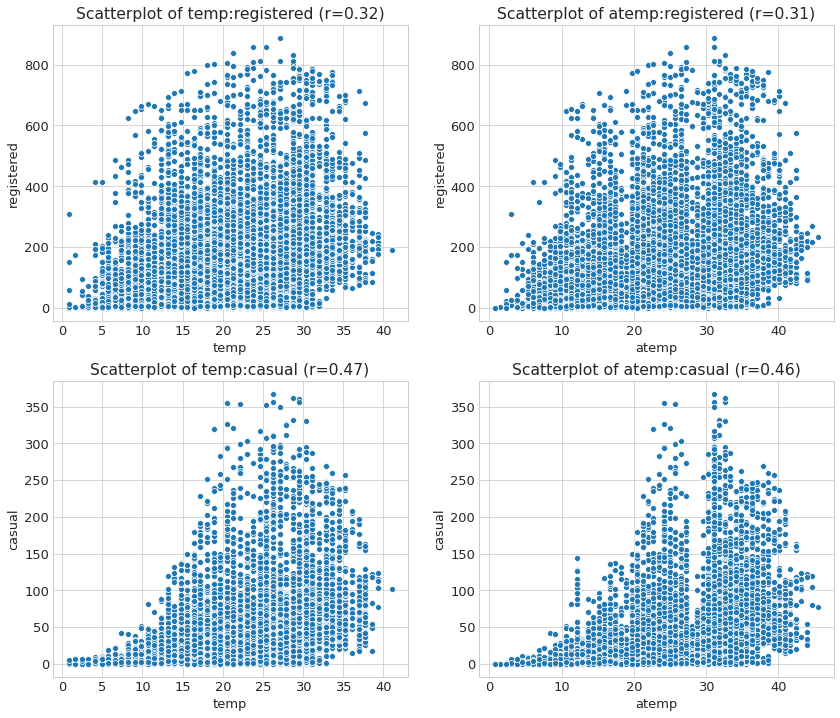

In [28]:
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(14, 12))
for ax, col in zip([ax0, ax1], ['temp', 'atemp']):
    sns.scatterplot(col, 'registered', data=df_train, ax=ax)
    ax.set_title('Scatterplot of {}:registered (r={:.2f})'.format(col, df_train['registered'].corr(df_train[col])))

for ax, col in zip([ax2, ax3], ['temp', 'atemp']):
    sns.scatterplot(col, 'casual', data=df_train, ax=ax)
    ax.set_title('Scatterplot of {}:casual (r={:.2f})'.format(col, df_train['casual'].corr(df_train[col])))

* 온도, 체감온도와 이용수가 관계가 양의 상관관계에 있다.
* 특히 casual 이용자의 경우, registered 이용자에 비해 상관계수가 더 높다.

## 6. Humidity
* 습도가 높을수록 불쾌지수가 높아지면서 이용수가 감소할 것으로 예상되는데, 한 번 살펴보자.

Text(0.5, 1.0, 'Scatterplot of humidity:count (r = -0.32)')

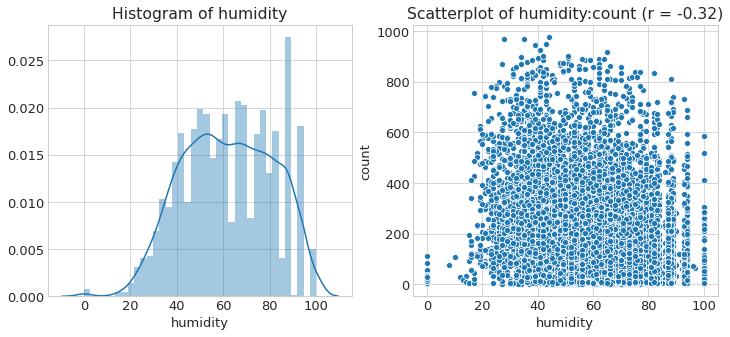

In [29]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(df_train['humidity'], ax=ax[0])
ax[0].set_title('Histogram of humidity')

sns.scatterplot('humidity', 'count', data=df_train, ax=ax[1])
ax[1].set_title('Scatterplot of humidity:count (r = {:.2f})'.format(df_train['count'].corr(df_train['humidity'])))

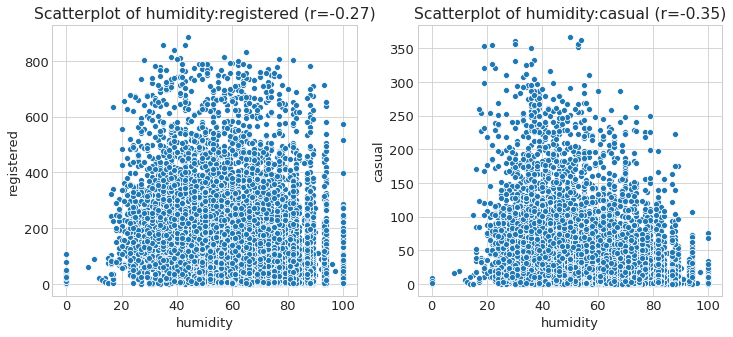

In [30]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
for ax, user in zip([ax0, ax1], ['registered', 'casual']):
    sns.scatterplot('humidity', user, data=df_train, ax=ax)
    ax.set_title('Scatterplot of humidity:{} (r={:.2f})'.format(user, df_train[user].corr(df_train['humidity'])))

* 이용수와 습도는 서로 음의 상관관계에 있고, casual유저의 상관계수가 registered 유저보다 높다.

## 7. Windspeed
* 풍속과의 관계를 살펴보자.

Text(0.5, 1.0, 'Scatterplot of windspeed:count (r = 0.10)')

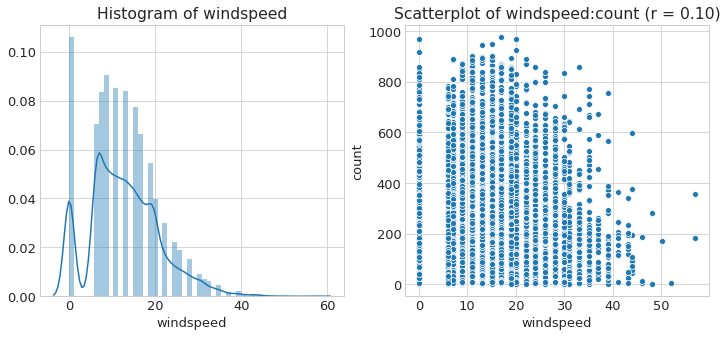

In [31]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(df_train['windspeed'], ax=ax[0])
ax[0].set_title('Histogram of windspeed')

sns.scatterplot('windspeed', 'count', data=df_train, ax=ax[1])
ax[1].set_title('Scatterplot of windspeed:count (r = {:.2f})'.format(df_train['count'].corr(df_train['windspeed'])))

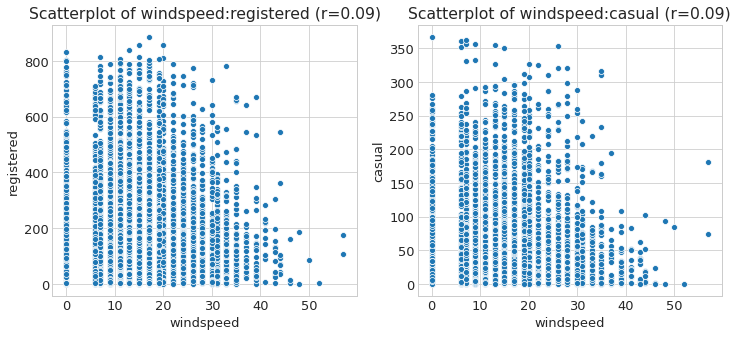

In [32]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))
for ax, user in zip([ax0, ax1], ['registered', 'casual']):
    sns.scatterplot('windspeed', user, data=df_train, ax=ax)
    ax.set_title('Scatterplot of windspeed:{} (r={:.2f})'.format(user, df_train[user].corr(df_train['windspeed'])))

* 바람과의 상관관계는 0.09로 낮다.
* 그리고 풍속이 0으로 집계된 날이 많다.

## 8. Year, Month, Day, Day of week
* 날짜에 따른 변화를 알아보자.

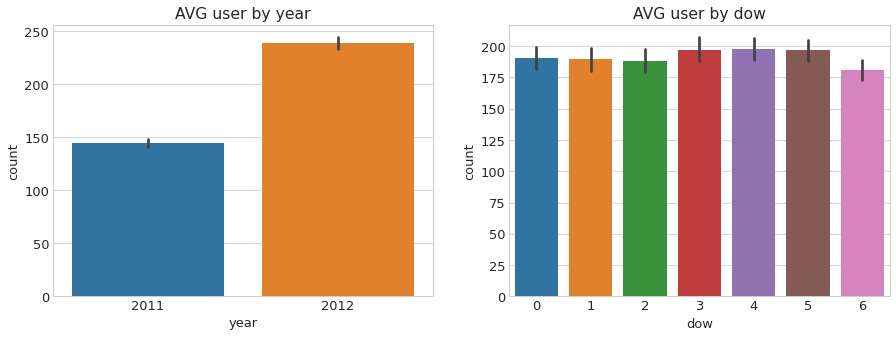

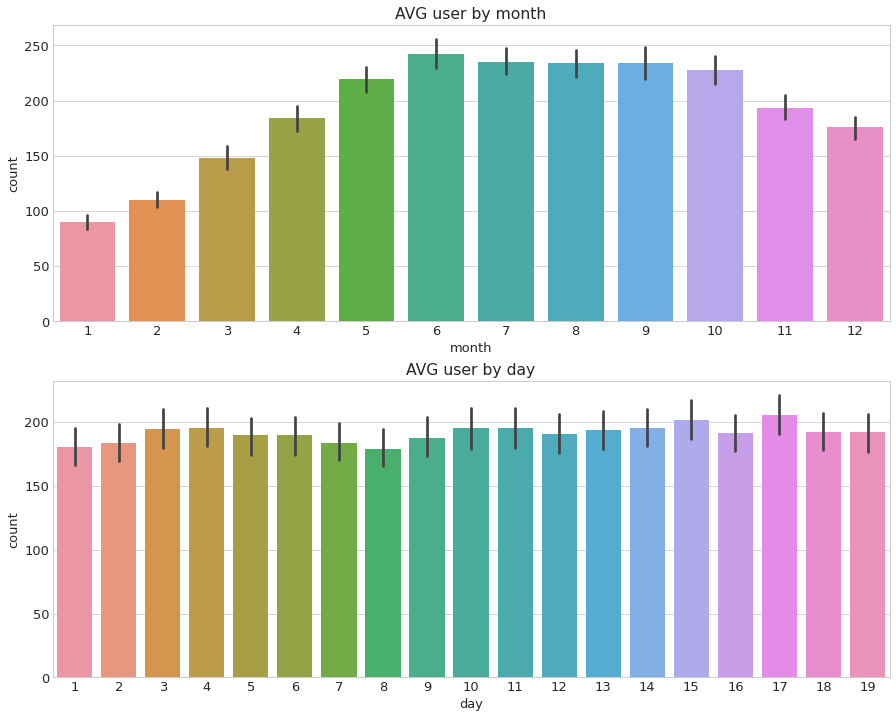

In [33]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, ax in zip(['year', 'dow'], [ax[0], ax[1]]):
    sns.barplot(col, 'count', data=df_train, ax=ax)
    ax.set_title('AVG user by {}'.format(col))
f, ax = plt.subplots(2, 1, figsize=(15, 12))
for col, ax in zip(['month', 'day'], [ax[0], ax[1]]):
    sns.barplot(col, 'count', data=df_train, ax=ax)
    ax.set_title('AVG user by {}'.format(col))

* 2012년에 이용수가 증가했다.
* 일요일의 이용수가 상대적으로 낮다.
* 6~10월 에 이르며 이용수가 증가하며, 이후 감소한다.
* 날짜는 train set에는 19일까지, test set에는 20일부터 존재하므로 큰 의미가 없다.

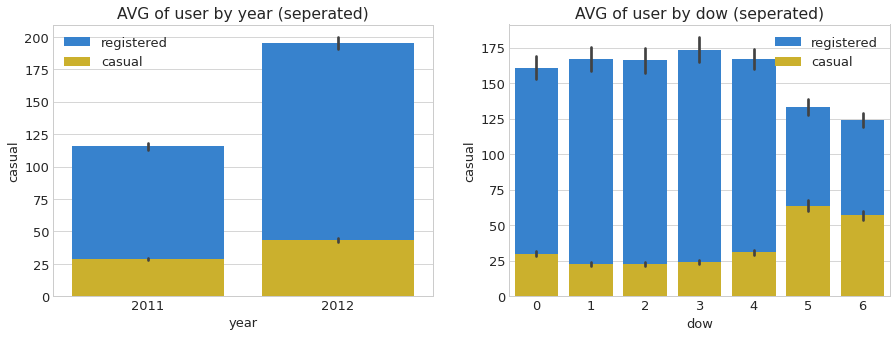

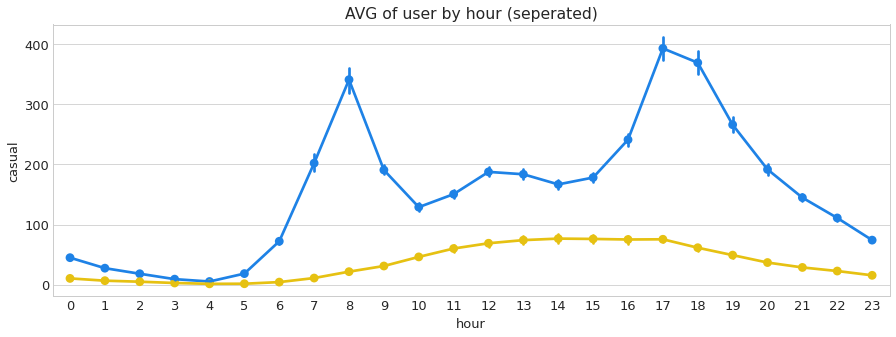

In [34]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot('year', 'registered', data=df_train, color=color[0], ax=ax[0], label='registered')
sns.barplot('year', 'casual', data=df_train, color=color[1], ax=ax[0], label='casual')
ax[0].set_title('AVG of user by year (seperated)')
ax[0].legend()

sns.barplot('dow', 'registered', data=df_train, color=color[0], ax=ax[1], label='registered')
sns.barplot('dow', 'casual', data=df_train, color=color[1], ax=ax[1], label='casual')
ax[1].set_title('AVG of user by dow (seperated)')
ax[1].legend(loc=1)

plt.figure(figsize=(15, 5))
sns.pointplot('hour', 'registered', data=df_train, color=color[0], label='registered')
sns.pointplot('hour', 'casual', data=df_train, color=color[1], label='casual')
plt.title('AVG of user by hour (seperated)')
plt.legend()

* 이용자별로 살펴보니, registered 연간 이용자 증가폭이 더 크다.
* registered 이용자는 주말 이용 감소를 보이는데 반해, casual 유저는 주말 이용이 증가한다.
* registered 이용자는 7-9시, 17-19시에 이용이 집중되어있다.
    * 출퇴근 시간으로, 직장인들의 비중이 높을것이라는 가설을 뒷받침해준다.
* casual은 오후시간대의 이용이 높다.

# F/E

In [50]:
df_train.shape
# df_test.shape

(6493, 59)

In [35]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


* 일단 필요없는 행들을 삭제.
    * datetime, day

In [36]:
del_col = ['datetime', 'day']
df_train.drop(del_col, axis=1, inplace=True)
df_test.drop(del_col, axis=1, inplace=True)

* 카테고리형 데이터 원핫인코딩 진행
    * season, weather, year, month, hour, dow

In [37]:
dummy_col = ['season', 'weather', 'year', 'month', 'hour', 'dow']
df_train = pd.get_dummies(df_train, columns=dummy_col)
df_test = pd.get_dummies(df_test, columns=dummy_col)

In [38]:
df_test

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,...,hour_21,hour_22,hour_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6489,0,1,10.66,12.880,60,11.0014,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6490,0,1,10.66,12.880,60,11.0014,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6491,0,1,10.66,13.635,56,8.9981,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [39]:
df_train

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,hour_21,hour_22,hour_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,0,0,9.84,14.395,81,0.0000,3,13,16,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,9.02,13.635,80,0.0000,8,32,40,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,9.02,13.635,80,0.0000,5,27,32,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,9.84,14.395,75,0.0000,3,10,13,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,9.84,14.395,75,0.0000,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,7,329,336,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,1,14.76,17.425,57,15.0013,10,231,241,0,...,0,0,0,0,0,1,0,0,0,0
10883,0,1,13.94,15.910,61,15.0013,4,164,168,0,...,1,0,0,0,0,1,0,0,0,0
10884,0,1,13.94,17.425,61,6.0032,12,117,129,0,...,0,1,0,0,0,1,0,0,0,0


# Modeling
* 나의 아이디어는,
    * casual, registered 이용자를 따로 예측하여 합하는 것이다.
* count를 직접 예측할 수도 있지만, EDA단계에서 두 세그먼트의 이용 행태가 달랐단 것을 확인했기때문에 이와 같이 진행한다.

In [139]:
X = df_train.drop(['casual', 'registered', 'count'], axis=1)
y_casual = df_train['casual']
y_registered = df_train['registered']
y_count = df_train['count']

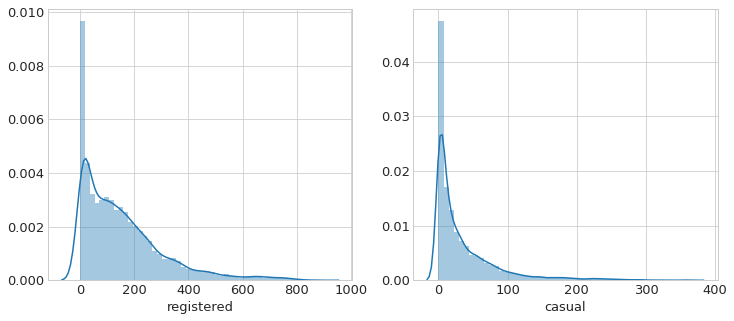

In [138]:
# 타겟값의 분포를 살펴보자.
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(y_registered, ax=ax[0])
sns.distplot(y_casual, ax=ax[1])

* 두 값 모두 log를 씌워 정규분포에 근사하도록 만들어보자.

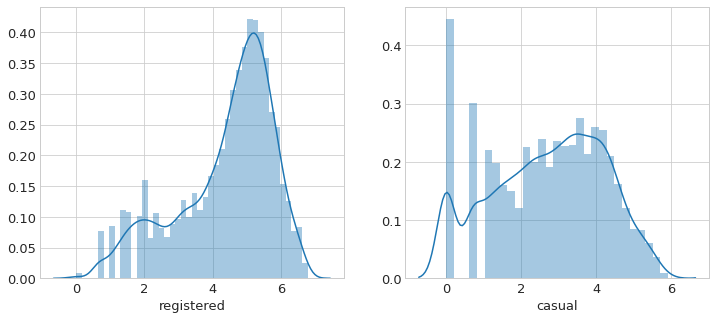

In [140]:
y_registered_log = np.log1p(y_registered)
y_casual_log = np.log1p(y_casual)
f, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(y_registered_log, ax=ax[0])
sns.distplot(y_casual_log, ax=ax[1])

### RMSLE 함수 만들기
* 이 대회는 RMSLE 지표로 평가한다.
* RMSLE : root mean square logarithmic error


In [177]:
def rmsle(y_hat, y):
    y_hat = np.exp(y_hat)
    y = np.exp(y)
    # 로그 씌우기
    y_hat_log = np.log1p(np.array(y_hat))
    y_log = np.log1p(np.array(y))
    # 예측값과 실제값 빼기
    diff = y_hat_log - y_log
    # 차이 제곱
    diff_square = np.square(diff)
    # 제곱 평균
    mean_diff_square = diff_square.mean()
    # 루트
    score = np.sqrt(mean_diff_square)

    return score

## RandomForest Regression을 통한 모델링

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
rmsle_scorer = make_scorer(rmsle)
rf = RandomForestRegressor(n_estimators=300)
scores = cross_val_score(rf, X, y_registered_log, scoring=rmsle_scorer)

In [181]:
print('rf_registered scores: {}\nAVG of scores: {:.2f}'.format(scores, scores.mean()))

rf_registered scores: [0.70987234 0.32527272 0.40598021 0.31480013 0.38217453]
AVG of scores: 0.43


In [183]:
rf.fit(X, y_registered_log)
registered = np.exp(rf.predict(df_test))

In [184]:
rf = RandomForestRegressor(n_estimators=300)
scores = cross_val_score(rf, X, y_casual_log, scoring=rmsle_scorer)
print('rf_casual scores: {}\nAVG of scores: {:.2f}'.format(scores, scores.mean()))

rf_casual scores: [0.59566432 0.45375633 0.58134879 0.57986498 0.53020183]
AVG of scores: 0.55


In [185]:
rf.fit(X, y_casual_log)
casual = np.exp(rf.predict(df_test))

In [186]:
count = registered + casual

In [187]:
submission = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')

In [188]:
submission['count'] = count

In [189]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.197603
1,2011-01-20 01:00:00,6.566473
2,2011-01-20 02:00:00,5.813731
3,2011-01-20 03:00:00,4.357735
4,2011-01-20 04:00:00,3.681558


In [190]:
submission.to_csv('submission_200427.csv', index=False)

In [191]:
submission.shape

(6493, 2)

In [ ]:
# 최종 점수(rmsle): 0.41567 
# 391 / 3242 (12%)